In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NeuralNetwork import NeuralNetwork
from sklearn.model_selection import train_test_split

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 



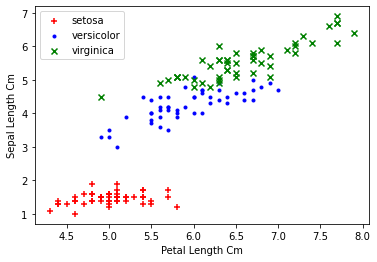

In [2]:
iris_db = pd.read_csv("Iris.csv")
print(iris_db.head(),"\n")

data_plot = iris_db.iloc[0:150, [1, 3]].values
plt.scatter(data_plot[:50, 0], data_plot[:50, 1], color='red', marker='+', label='setosa')
plt.scatter(data_plot[50:100, 0], data_plot[50:100, 1], color='blue', marker='.', label='versicolor')
plt.scatter(data_plot[100:150, 0], data_plot[100:150, 1], color='green', marker='x', label='virginica')
plt.xlabel('Petal Length Cm')
plt.ylabel('Sepal Length Cm')
plt.legend(loc='upper left')
plt.show()

In [3]:
classes = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
data = iris_db.replace(classes,list(range(3)))
print(data.max(axis=0))

cols = list(data.max(axis=0)[1:].index)
vals = list(data.max(axis=0)[1:])

for idx_col in range(len(cols)):
    data[cols[idx_col]] /= vals[idx_col]

print("\nOnce the values are normalized:\n",data.max(axis=0))
train_data, test_data = train_test_split(data, test_size=0.2)
#train_data.head()
test_data.head()

Id               150.0
SepalLengthCm      7.9
SepalWidthCm       4.4
PetalLengthCm      6.9
PetalWidthCm       2.5
Species            2.0
dtype: float64

Once the values are normalized:
 Id               150.0
SepalLengthCm      1.0
SepalWidthCm       1.0
PetalLengthCm      1.0
PetalWidthCm       1.0
Species            1.0
dtype: float64


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
136,137,0.797468,0.772727,0.811594,0.96,1.0
43,44,0.632911,0.795455,0.231884,0.24,0.0
83,84,0.759494,0.613636,0.739130,0.64,0.5
42,43,0.556962,0.727273,0.188406,0.08,0.0
79,80,0.721519,0.590909,0.507246,0.40,0.5


In [4]:
# The training set, with 150 examples consisting of 4
# input values and 1 output value

training_inputs = np.squeeze(train_data.iloc[:, list(range(1,5))].values)
training_outputs = np.array([train_data["Species"]]).T
#training_outputs[:5]
training_inputs[:5]

array([[0.96202532, 0.68181818, 0.95652174, 0.84      ],
       [0.72151899, 0.63636364, 0.5942029 , 0.52      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.97468354, 0.68181818, 0.88405797, 0.92      ],
       [0.70886076, 0.56818182, 0.56521739, 0.44      ]])

# Training

In [5]:
# Initialize the single neuron neural network
input_size = 4
neural_network = NeuralNetwork(input_size)

print("Random starting synaptic weights: ")
print(neural_network.synaptic_weights)

# Train the neural network
neural_network.train(training_inputs, training_outputs, 100)

print("Synaptic weights after training: ")
print(neural_network.synaptic_weights)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]]
Synaptic weights after training: 
[[-5.11961173]
 [-9.53559271]
 [ 5.80313919]
 [10.42515623]]


# Testing

In [8]:
classes = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
features = list(data.max(axis=0)[1:].index)
results = []
for test_indx in test_data["Id"]:
    parameters = [test_data[feature][test_indx-1] for feature in features]
    train_test,specie = parameters[:4],parameters[4]*2
    prediction = round(neural_network.think(np.array(train_test))[0]*2,1)
    prediction_class = round(prediction,0)
    results.append(1 if specie == prediction_class else 0)
    print("Real Specie: ",specie," Predicted output: ", prediction," -> ",prediction_class," -> ",classes[int(prediction_class)])

accuracy = sum(results) / len(results)
print("Accuracy: "+str(accuracy))

Real Specie:  2.0  Predicted output:  1.9  ->  2.0  ->  Iris-virginica
Real Specie:  0.0  Predicted output:  0.0  ->  0.0  ->  Iris-setosa
Real Specie:  1.0  Predicted output:  1.5  ->  2.0  ->  Iris-virginica
Real Specie:  0.0  Predicted output:  0.0  ->  0.0  ->  Iris-setosa
Real Specie:  1.0  Predicted output:  0.2  ->  0.0  ->  Iris-setosa
Real Specie:  1.0  Predicted output:  0.7  ->  1.0  ->  Iris-versicolor
Real Specie:  0.0  Predicted output:  0.0  ->  0.0  ->  Iris-setosa
Real Specie:  0.0  Predicted output:  0.0  ->  0.0  ->  Iris-setosa
Real Specie:  2.0  Predicted output:  1.4  ->  1.0  ->  Iris-versicolor
Real Specie:  0.0  Predicted output:  0.0  ->  0.0  ->  Iris-setosa
Real Specie:  1.0  Predicted output:  0.7  ->  1.0  ->  Iris-versicolor
Real Specie:  1.0  Predicted output:  0.8  ->  1.0  ->  Iris-versicolor
Real Specie:  0.0  Predicted output:  0.0  ->  0.0  ->  Iris-setosa
Real Specie:  2.0  Predicted output:  1.7  ->  2.0  ->  Iris-virginica
Real Specie:  1.0  Pred

In [9]:
test_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
136,137,0.797468,0.772727,0.811594,0.96,1.0
43,44,0.632911,0.795455,0.231884,0.24,0.0
83,84,0.759494,0.613636,0.739130,0.64,0.5
42,43,0.556962,0.727273,0.188406,0.08,0.0
79,80,0.721519,0.590909,0.507246,0.40,0.5
56,57,0.797468,0.750000,0.681159,0.64,0.5
11,12,0.607595,0.772727,0.231884,0.08,0.0
22,23,0.582278,0.818182,0.144928,0.08,0.0
125,126,0.911392,0.727273,0.869565,0.72,1.0
27,28,0.658228,0.795455,0.217391,0.08,0.0
